 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [11/Jan/2022 14:54:54] "GET / HTTP/1.1" 200 -


C:\Users\Ahmed Hussein2022\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


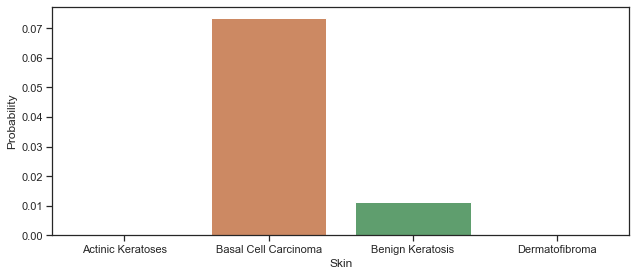

127.0.0.1 - - [11/Jan/2022 14:54:59] "POST /Solution HTTP/1.1" 200 -
127.0.0.1 - - [11/Jan/2022 14:55:00] "GET /static/data/ISIC_0029330.jpg HTTP/1.1" 200 -
127.0.0.1 - - [11/Jan/2022 14:55:00] "GET /static/temp/vtbzdnfr.png HTTP/1.1" 200 -
127.0.0.1 - - [11/Jan/2022 14:55:09] "GET / HTTP/1.1" 200 -
C:\Users\Ahmed Hussein2022\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


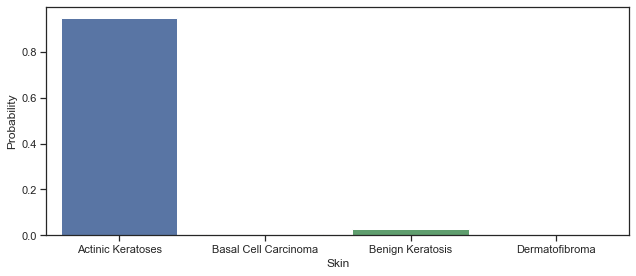

127.0.0.1 - - [11/Jan/2022 14:55:16] "POST /Solution HTTP/1.1" 200 -
127.0.0.1 - - [11/Jan/2022 14:55:16] "GET /static/data/ISIC_0029354.jpg HTTP/1.1" 200 -
127.0.0.1 - - [11/Jan/2022 14:55:16] "GET /static/temp/aaizcuaw.png HTTP/1.1" 200 -
127.0.0.1 - - [11/Jan/2022 15:15:24] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [11/Jan/2022 15:15:24] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [11/Jan/2022 15:15:24] "GET / HTTP/1.1" 200 -
C:\Users\Ahmed Hussein2022\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


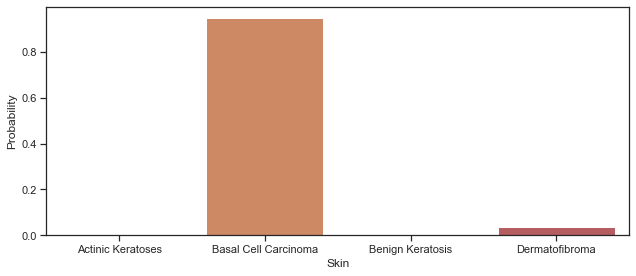

127.0.0.1 - - [11/Jan/2022 15:17:09] "POST /Solution HTTP/1.1" 200 -
127.0.0.1 - - [11/Jan/2022 15:17:09] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [11/Jan/2022 15:17:09] "GET / HTTP/1.1" 200 -
C:\Users\Ahmed Hussein2022\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


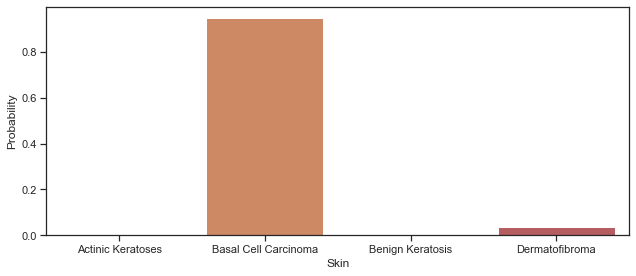

127.0.0.1 - - [11/Jan/2022 15:17:16] "POST /Solution HTTP/1.1" 200 -
127.0.0.1 - - [11/Jan/2022 15:17:16] "GET /static/data/basal_cell_carcinoma_b_high_ar.jpg HTTP/1.1" 200 -
127.0.0.1 - - [11/Jan/2022 15:17:16] "GET /static/temp/qwugukfz.png HTTP/1.1" 200 -
127.0.0.1 - - [11/Jan/2022 15:18:20] "GET / HTTP/1.1" 200 -
C:\Users\Ahmed Hussein2022\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


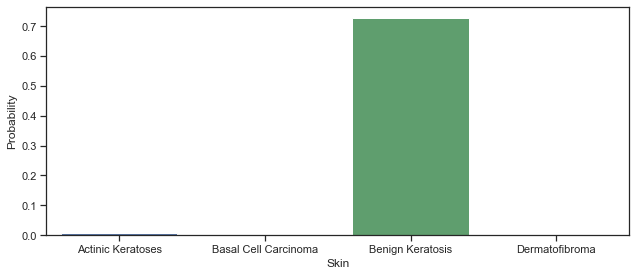

127.0.0.1 - - [11/Jan/2022 15:18:30] "POST /Solution HTTP/1.1" 200 -
127.0.0.1 - - [11/Jan/2022 15:18:30] "GET /static/data/keratosis.jpg HTTP/1.1" 200 -
127.0.0.1 - - [11/Jan/2022 15:18:30] "GET /static/temp/hcjqwenp.png HTTP/1.1" 200 -


In [ ]:




from flask import Flask ,redirect
from flask import send_file
from flask import render_template
from flask import request
import tensorflow as tf 
import numpy as np
import os
import base64
from io import BytesIO
from PIL import Image ,ImageOps
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import Model, model_from_json
import matplotlib.pyplot as plt
import seaborn as sns
import string
import random


app = Flask(__name__)

SKIN_CLASSES = {
  0: 'Actinic Keratoses',
  1: 'Basal Cell Carcinoma',
  2: 'Benign Keratosis',
  3: 'Dermatofibroma',
  4: 'Melanoma',
  5: 'Melanocytic Nevi',
  6: 'Vascular skin lesion'

}
def get_random_string(length):
    # choose from all lowercase letter
    letters = string.ascii_lowercase
    result_str = ''.join(random.choice(letters) for i in range(length))
    return result_str

        
        
        
"""------------------------Load The Model And Preprocessing the  the input Img----------------------------------"""

j_file = open('modelnew.json', 'r')
loaded_json_model = j_file.read()
j_file.close()
model = model_from_json(loaded_json_model)
model.load_weights('modelnew.h5')


"""-----------------------End Of Preprocessing-----------------------------"""

@app.route("/dtls",methods=['GET', 'POST'])
def dtls():
    return render_template('dtls.html')

@app.route("/about",methods=['GET', 'POST'])
def Home():
    return render_template("about.html")

@app.route("/home",methods=['GET', 'POST'])
def About():
    return render_template("home.html")


@app.route("/",methods=['GET', 'POST'])
def Solution():
    return render_template("test.html")



@app.route("/Solution", methods=['GET', 'POST'])
def upload():
    if request.method == 'POST':
        imgg = request.files['image_file']
        if imgg == None:
            return ("Error")
        """--------------------------------------------Get Patient Data And Skin img---------------------------------------"""
        path='static/data/'+imgg.filename 
        pth=path[7:]
        id=request.form.get('a1')
        name=request.form.get('a2')
        age=request.form.get('a3')
        gender=request.form.get('a4')
        
        data={'id':id,'name':name,'age':age,'gender':gender,'img':imgg,'pth':path,'plt':"temp/_.png"}
        
        
        
        imgg.save(path)        
        img1 = tf.keras.preprocessing.image.load_img(path, target_size=(224,224))
        img1 = np.array(img1)
        img1 = img1.reshape((1,224,224,3))
        img1 = img1/255
        
        """--------------------------------------------Model Predection---------------------------------------"""
        prediction = model.predict(img1)
        pred = np.argmax(prediction)    
        disease = SKIN_CLASSES[pred]
        accuracy = prediction[0][pred]
        
        """--------------------------------------------Plot and Save Predection---------------------------------------"""
        sns.set(rc={"figure.figsize":(9, 4)})
        sns.set_style('ticks')
        g=sns.barplot(list(SKIN_CLASSES.values())[:4], prediction[0][:4])
        g.set(xlabel='Skin', ylabel='Probability')
        g.set_xticklabels(g.get_xticklabels(), rotation=0, ha="center")

        import shutil
        shutil.rmtree("static/temp")
        
        os.makedirs('static/temp')

        plotFolder="static/temp/"+get_random_string(8)
        plt.savefig(plotFolder+".png",dpi=110)
        f=plotFolder+".png"
        
        
        plt.subplots_adjust(left=0.1, bottom=0.100, right=0.6, top=0.8)
        plt.tight_layout()
        plt.show()  
    """--------------------------------------------Redirect to Patient Details page and sent patient data include plots---------------------------------------"""
    return render_template('dtls.html',data=data,pth=pth,f=f[7:])



if __name__ == "__main__":
    app.run(debug = False)
    
 